In [8]:
%matplotlib inline
import os
import cv2
import glob
import matplotlib.pyplot as plt
import random
import numpy as np
import cityscapes_label
import label

In [9]:
def detail_images(image_file, label_file, labels, dataset, color_file=None):
    
    print('Image file:', image_file.split('/')[-1])
    print('Label file:', label_file.split('/')[-1])
    
    train_img = plt.imread(image_file)
    label_img = cv2.imread(label_file, 0)
    color_img = np.zeros(train_img.shape, np.uint8)
    
    for i in range(len(labels)):
        if dataset == 'cityscapes':
            trainId = labels[i].id
            color = labels[i].color
            color_img[label_img == trainId] = color
        elif dataset == 'bdd':
            trainId = labels[i].trainId
            if trainId != 255:
                color = labels[i].color
                color_img[label_img == trainId] = color   
        elif dataset == 'mapillary':
            color_img = plt.imread(color_file)
            
    print('Shapes of train, label, color:', 
          train_img.shape, label_img.shape, color_img.shape)
    print('Dtype of train, label, color:', 
          train_img.dtype, label_img.dtype, color_img.dtype)
    print('Max values of train, label, color:', 
         np.max(train_img), np.max(label_img), np.max(color_img))
    print('Min values of train, label, color:', 
         np.min(train_img), np.min(label_img), np.min(color_img)) 
    
    unique = np.unique(label_img)
    
    print('Classes in image:', unique)

    plt.figure(figsize=(9, 14))

    plt.subplot(3,1,1)
    plt.imshow(train_img)
    plt.axis('off')

    plt.subplot(3,1,2)
    plt.imshow(label_img)
    plt.axis('off')

    plt.subplot(3,1,3)
    plt.imshow(color_img)
    plt.axis('off')    
    
    plt.show()
    

### Cityscapes

In [10]:
# https://www.cityscapes-dataset.com/
# gtFine_trainvaltest.zip (241MB) [md5]
# leftImg8bit_trainvaltest.zip (11GB) [md5]

No of images and labels: 2975 2975
Index: 143
Image file: aachen_000143_000019_leftImg8bit.png
Label file: aachen_000143_000019_gtFine_labelIds.png
Shapes of train, label, color: (1024, 2048, 3) (1024, 2048) (1024, 2048, 3)
Dtype of train, label, color: float32 uint8 uint8
Max values of train, label, color: 1.0 26 251
Min values of train, label, color: 0.0 0 0
Classes in image: [ 0  1  3  4  7  8 11 12 13 17 19 20 21 22 23 24 26]


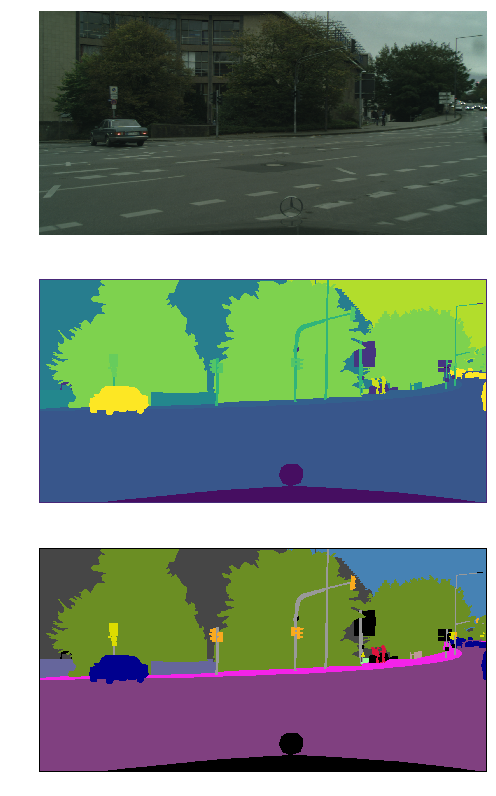

In [11]:
images_train = sorted(glob.glob('leftImg8bit_trainvaltest/leftImg8bit/train/*/*.png'))
labels_train = sorted(glob.glob('gtFine_trainvaltest/gtFine/train/*/*labelIds.png'))

print('No of images and labels:', len(images_train), len(labels_train))

idx = random.randint(0, len(images_train))
print('Index:', idx)
detail_images(images_train[idx], labels_train[idx], 
              cityscapes_label.labels, 'cityscapes')

### BDD

In [12]:
# http://bdd-data.berkeley.edu

# Segmentation bdd100k_seg.zip

No of images and Labels: 7000 7000
Index: 4622
Image file: 62fb9a37-d970bbfc.jpg
Label file: 62fb9a37-d970bbfc_train_id.png
Shapes of train, label, color: (720, 1280, 3) (720, 1280) (720, 1280, 3)
Dtype of train, label, color: uint8 uint8 uint8
Max values of train, label, color: 255 255 251
Min values of train, label, color: 0 0 0
Classes in image: [  0   2   4   5   7   9  10  13  15 255]


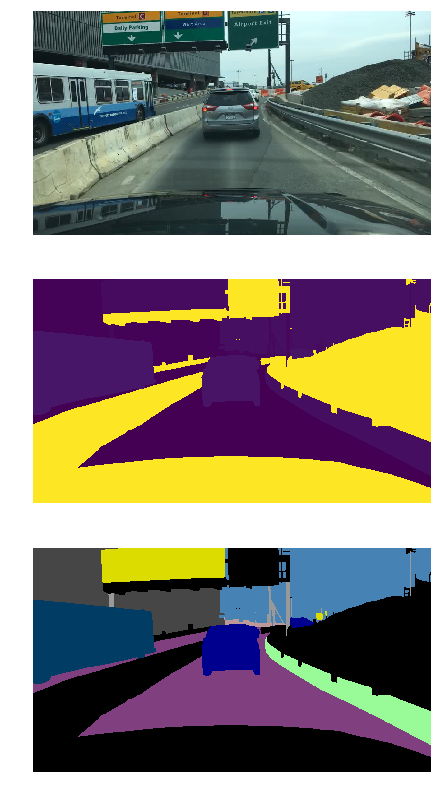

In [13]:
images_train = sorted(glob.glob('bdd100k/seg/images/train/*'))
labels_train = sorted(glob.glob('bdd100k/seg/labels/train/*'))

print('No of images and Labels:', len(images_train), len(labels_train))

idx = random.randint(0, len(images_train))
print('Index:', idx)
detail_images(images_train[idx], labels_train[idx], 
              label.labels, 'bdd')

Mapillary

In [14]:
# https://www.mapillary.com/dataset/vistas

# mapillary-vistas-dataset_public_v1.1.zip

No of images and Labels: 18000 18000
Index: 154
Image file: -bUoZ462ACyCa1NsP5rnMA.jpg
Label file: -bUoZ462ACyCa1NsP5rnMA.png
Shapes of train, label, color: (2448, 3264, 3) (2448, 3264) (2448, 3264, 3)
Dtype of train, label, color: uint8 uint8 float32
Max values of train, label, color: 255 65 1.0
Min values of train, label, color: 0 2 0.0
Classes in image: [ 2  3  6  9 13 15 17 19 20 21 23 24 27 30 35 44 45 47 48 49 50 52 55 57
 61 64 65]


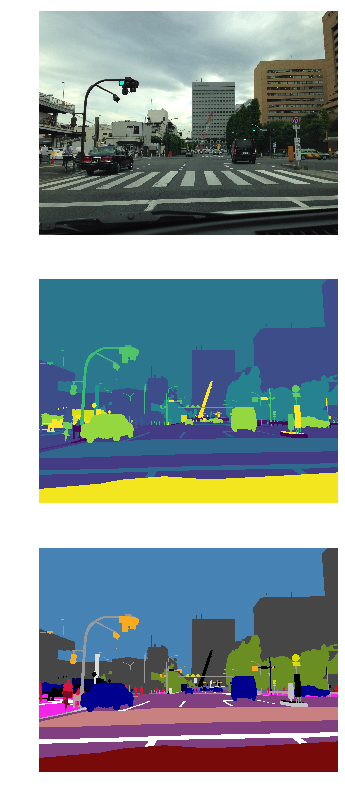

In [15]:
images_train = sorted(glob.glob('mapillary-vistas-dataset_public_v1.1/training/images/*'))
labels_train = sorted(glob.glob('mapillary-vistas-dataset_public_v1.1/training/instances/*'))
colors_train = sorted(glob.glob('mapillary-vistas-dataset_public_v1.1/training/labels/*'))

print('No of images and Labels:', len(images_train), len(labels_train))

idx = random.randint(0, len(images_train))
print('Index:', idx)
detail_images(images_train[idx], labels_train[idx], 
              label.labels, 'mapillary', colors_train[idx])